### Install libraries

In [59]:
import pandas as pd
import numpy as np
!pip install saspy
import saspy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Data from CDC Behavioral Risk Factor Surveillance System

The 2017 BRFSS data continues to reflect the changes initially made in 2011 in weighting methodology (raking) and the addition of cell phone only respondents. The aggregate BRFSS combined landline and cell phone dataset is built from the landline and cell phone data submitted for 2017 and includes data for 50 states, the District of Columbia, Guam, and Puerto Rico.

There are 450,016 records for 2017.

The website is: https://www.cdc.gov/brfss/annual_data/annual_2017.html

Codebook for all variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

Codebook for calculated variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

In [60]:
data = pd.read_sas(r'C:\Users\Nick\Desktop\GitProjects\LLCP2017XPT\LLCP2017.xpt', format='xport')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000001',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,b'01122017',b'01',b'12',b'2017',1100.0,b'2017000002',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,b'01102017',b'01',b'10',b'2017',1100.0,b'2017000003',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0
3,1.0,1.0,b'02082017',b'02',b'08',b'2017',1200.0,b'2017000004',2.017000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
4,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000005',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0


In [61]:
data.shape

(450016, 358)

### Variables and coding info

___STATE__ 

(US state: 1-72; MA=#25)

___PRACE1__ 

(race: 1=White, 2= Black, 3=Native American/Alaskan, 4=Asian, 5=Native Hawaiian/Pacific Islander, 6=other, 7=no preferred race, 8=multi-racial, but chose not to select other race, 77=don't know, 99=refused)

___AGE_G__

(1=18-24, 2=25-34, 3=35-44, 4=45-54, 5=55-64, 6=65+)

___BMI5CAT__

(BMI: 1= underweight, 2=normal weight, 3=overweight, 4=obese, .=don't know/refused)

_Body Mass Index_

__CHILDREN__ 

(1-87, 88=None, 99=refused/missing)

_# of children in household?_

___EDUCAG__ 

(edu: 1=<HS, 2=HS, 3=Attended College/Tech school, 4=Graduated College/Tech, 9=don't know/missing/refused)

_Education level_

___INCOMG__ 

(1=<15k, 2=15-25k, 3=25-35k, 4=35-50k, 5=50k+, 9=don't know/missing/refused)

_Income level_

___DRNKWEK__ 

(0=no drinks, 1-999+=number of drinks per week, 99900=don't know/refused/missing)

_# alcoholic drinks per week?_

__DRNK3GE5__

(1-76, 88=None, 77=don't know, 99=refused)

_"Considering all types of alcoholic beverages, how many times during the past 30 days did you have 5 or more drinks for men or 4 or more drinks for women on an occasion?_

___RFDRHV5__ 

(1=no, 2=yes, 9=don't know/missing/refused)

_Heavy alcohol consumption?_

___PACAT1__

(1=highly active, 2=active, 3=insufficiently active, 4=inactive, 9=don't know/refused/missing)

_Physical activity level_

__PA1MIN___

(0-99999)

_"Minutes of total physical activity per week?"_

__EXERANY2__

(1=Yes, 2=No, 7=dont' know, 9=refused)

_"During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?_

___RFHLTH__

(1=good or better, 2=fair or poor, 9=don't know/missing, refused)

_General health status?_

___VEGESU1__

(1-99998)

_"Total vegetables consumed each day?"_

__ADSLEEP__

(1-14, 88=None, 77=don't know, 99=Missing)

_"Over the last 2 weeks, how many days have you had trouble falling asleep or staying asleep or sleeping too much?"_

___HCVU651__

(1=have, 2=don't have, 9=don't know, missing, refused)

_"Do you have access to healthcare?"_

__EMPLOY1__

(1=Employed, 2=Self-Employed, 3=Unemployed 1+yrs, 4=Unemployed <1yr, 5=Homemaker, 6=Student, 7=Retired, 8=Unable to work, 9=refused)

_Employment_

__VETERAN3__

(1=Yes, 2=No, 7=don't know, 9=refused)

_"Have you ever served on active duty in the United States Armed Forces, either in the regular military or in a National Guard or military reserve unit?"_

__MARITAL__

(1=Married, 2=Divorced, 3=Widowed, 4=Separated, 5=Never Married, 6=Coupled, not married, 9=Refused)

_"What is your marital status?"_

__MARIJANA__

(1-30, 88=none, 77=don't know, 99=missing)

_"During the past  30  days, on how many days did you use marijuana or hashish?_

__ADDEPEV2__

(1=yes, 2=no, 7=don't know, 9=refused)

_"(Ever told) you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?"_

__CIMEMLOS__

(1=Yes, 2=No, 7=don't know, 9=missing)

_"During the past 12 months, have you experienced confusion or memory loss that is happening more often or is getting worse?"_

__LSATISFY__

(1=Very Satisfied, 2=Satisfied, 3=Disatisfied, 4=Very Disatisfied, 7=don't know, 9=refused)

_"In general, how satisfied are you with your life?

__FIREARM4__

(1=Yes, 2=No, 7=don't know, 9=refused)

_"Are any firearms kept in or around your home?"_

__POORHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?"

__PHYSHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?"_

__MENTHLTH__

(1-30 days not good, 77=Unsure, 88=no days bad, 99=missing)

_"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"_

### Create subset including only the variables listed above:

In [63]:
LLCP=data[['_STATE','_PRACE1', '_AGE_G', '_BMI5CAT', 'CHILDREN', '_EDUCAG', '_INCOMG', '_DRNKWEK', 'DRNK3GE5', 
           '_RFDRHV5', '_PACAT1', 'PA1MIN_', 'EXERANY2', '_RFHLTH', '_VEGESU1', 'ADSLEEP', '_HCVU651', 
           'EMPLOY1', 'VETERAN3', 'MARITAL', 'MARIJANA', 'ADDEPEV2', 'CIMEMLOS', 'LSATISFY', 'FIREARM4',
           'POORHLTH', 'PHYSHLTH', 'MENTHLTH']]

LLCP.head(20)

,_STATE,_PRACE1,_AGE_G,_BMI5CAT,CHILDREN,_EDUCAG,_INCOMG,_DRNKWEK,DRNK3GE5,_RFDRHV5,...,VETERAN3,MARITAL,MARIJANA,ADDEPEV2,CIMEMLOS,LSATISFY,FIREARM4,POORHLTH,PHYSHLTH,MENTHLTH
0,1.0,1.0,6.0,3.0,88.0,4.0,4.0,5.397605e-79,NaN,1.0,...,1.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
1,1.0,1.0,6.0,3.0,88.0,4.0,5.0,5.397605e-79,NaN,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
2,1.0,1.0,6.0,3.0,88.0,1.0,9.0,1.000000e+02,88.0,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
3,1.0,1.0,6.0,3.0,88.0,1.0,1.0,5.397605e-79,NaN,1.0,...,2.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,88.0,88.0
4,1.0,1.0,6.0,2.0,88.0,1.0,1.0,5.397605e-79,NaN,1.0,...,2.0,3.0,NaN,2.0,NaN,NaN,NaN,14.0,14.0,88.0
5,1.0,1.0,6.0,3.0,88.0,2.0,2.0,6.000000e+02,88.0,1.0,...,1.0,3.0,NaN,2.0,NaN,NaN,NaN,88.0,6.0,88.0
6,1.0,1.0,6.0,3.0,88.0,3.0,5.0,5.397605e-79,NaN,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
7,1.0,1.0,6.0,NaN,88.0,2.0,9.0,5.397605e-79,NaN,1.0,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,88.0,88.0
8,1.0,1.0,6.0,2.0,88.0,2.0,3.0,5.397605e-79,NaN,1.0,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,88.0,88.0,25.0
9,1.0,1.0,4.0,3.0,1.0,2.0,4.0,6.000000e+02,88.0,1.0,...,2.0,2.0,NaN,2.0,NaN,NaN,NaN,88.0,2.0,1.0


In [64]:
LLCP.dtypes

_STATE      float64
_PRACE1     float64
_AGE_G      float64
_BMI5CAT    float64
CHILDREN    float64
_EDUCAG     float64
_INCOMG     float64
_DRNKWEK    float64
DRNK3GE5    float64
_RFDRHV5    float64
_PACAT1     float64
PA1MIN_     float64
EXERANY2    float64
_RFHLTH     float64
_VEGESU1    float64
ADSLEEP     float64
_HCVU651    float64
EMPLOY1     float64
VETERAN3    float64
MARITAL     float64
MARIJANA    float64
ADDEPEV2    float64
CIMEMLOS    float64
LSATISFY    float64
FIREARM4    float64
POORHLTH    float64
PHYSHLTH    float64
MENTHLTH    float64
dtype: object

In [65]:
LLCP.isnull().sum()

_STATE           0
_PRACE1          5
_AGE_G           0
_BMI5CAT     36446
CHILDREN        15
_EDUCAG          0
_INCOMG          0
_DRNKWEK         0
DRNK3GE5    229909
_RFDRHV5         0
_PACAT1          0
PA1MIN_     156652
EXERANY2     33153
_RFHLTH          0
_VEGESU1     47460
ADSLEEP     400082
_HCVU651         0
EMPLOY1          6
VETERAN3        11
MARITAL          7
MARIJANA    386565
ADDEPEV2         3
CIMEMLOS    432453
LSATISFY    430424
FIREARM4    432191
POORHLTH    212699
PHYSHLTH         1
MENTHLTH         1
dtype: int64

In [90]:
LLCP.describe()

,_STATE,_PRACE1,_AGE_G,_BMI5CAT,CHILDREN,_EDUCAG,_INCOMG,_DRNKWEK,DRNK3GE5,_RFDRHV5,...,VETERAN3,MARITAL,MARIJANA,ADDEPEV2,CIMEMLOS,LSATISFY,FIREARM4,POORHLTH,PHYSHLTH,MENTHLTH
count,450016.000000,438879.000000,450016.000000,413570.000000,446453.000000,448309.000000,374931.000000,4.199500e+05,217222.000000,450016.000000,...,450005.000000,450009.000000,63451.000000,450013.000000,17563.000000,19592.000000,17825.000000,237317.000000,450015.000000,450015.000000
mean,28.816780,1.374518,4.416081,2.965991,0.511904,2.956367,3.748460,2.840325e+02,1.138724,1.590866,...,1.882212,2.316794,83.856078,1.827374,1.939646,1.603920,2.011557,54.968388,60.014571,63.567452
std,15.813072,1.036059,1.583006,0.829725,1.032935,0.968905,1.447313,9.016715e+02,3.762771,1.999338,...,0.433243,1.720470,17.272721,0.557494,0.592345,0.812855,1.856372,38.225797,37.247246,36.219920
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.397605e-79,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,5.397605e-79,0.000000,1.000000,...,2.000000,1.000000,88.000000,2.000000,2.000000,1.000000,1.000000,10.000000,15.000000,20.000000
50%,27.000000,1.000000,5.000000,3.000000,0.000000,3.000000,4.000000,2.300000e+01,0.000000,1.000000,...,2.000000,1.000000,88.000000,2.000000,2.000000,2.000000,2.000000,88.000000,88.000000,88.000000
75%,41.000000,1.000000,6.000000,4.000000,1.000000,4.000000,5.000000,2.330000e+02,1.000000,1.000000,...,2.000000,3.000000,88.000000,2.000000,2.000000,2.000000,2.000000,88.000000,88.000000,88.000000
max,72.000000,7.000000,6.000000,4.000000,23.000000,4.000000,5.000000,5.320000e+04,76.000000,9.000000,...,9.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000,99.000000


### Replace all "don't know/refused/missing" values with NaN

In [67]:
LLCP['_PRACE1'].replace(77, np.nan, inplace=True)
LLCP['_PRACE1'].replace(99, np.nan, inplace=True)

In [70]:
LLCP['_BMI5CAT'].replace('.', np.nan, inplace=True)

In [77]:
LLCP['CHILDREN'].replace(88, 0, inplace=True)
LLCP['CHILDREN'].replace(99, np.nan, inplace=True)

In [80]:
LLCP.CHILDREN.unique()

array([ 0.,  1.,  3.,  2.,  4., nan,  5.,  6.,  8., 10.,  9.,  7., 17.,
       12., 13., 11., 15., 72., 14., 16., 23.])

#### As seen above, someone reported having 72 children. Although not entirely impossible, this seems like a "joke response", so drop that value too. The '23' also seems high, but who knows?

In [81]:
LLCP['CHILDREN'].replace(72, np.nan, inplace=True)

In [83]:
LLCP['_EDUCAG'].replace(9, np.nan, inplace=True)

In [85]:
LLCP['_INCOMG'].replace(9, np.nan, inplace=True)

In [87]:
LLCP['_DRNKWEK'].replace(99900, np.nan, inplace=True)

In [91]:
LLCP._DRNKWEK.unique()

array([5.39760535e-79, 1.00000000e+02, 6.00000000e+02, 2.30000000e+01,
       4.70000000e+01, 9.30000000e+01, 7.00000000e+01, 2.33000000e+02,
       3.00000000e+02, 1.35300000e+03, 3.73000000e+02,            nan,
       2.80000000e+02, 2.00000000e+02, 1.40000000e+03, 1.87000000e+02,
       1.12000000e+03, 7.00000000e+02, 1.40000000e+02, 2.10000000e+03,
       2.10000000e+02, 9.80000000e+02, 4.00000000e+02, 2.50000000e+03,
       1.30700000e+03, 9.00000000e+02, 8.00000000e+02, 5.83000000e+02,
       2.10000000e+04, 1.05000000e+03, 6.00000000e+03, 5.00000000e+02,
       4.67000000e+02, 7.47000000e+02, 9.33000000e+02, 1.17000000e+02,
       3.50000000e+02, 1.02700000e+03, 1.00000000e+03, 6.53000000e+02,
       2.33300000e+03, 2.24000000e+03, 1.16700000e+03, 3.27000000e+02,
       2.03000000e+03, 2.80000000e+03, 1.20000000e+03, 1.50000000e+03,
       4.20000000e+02, 4.20000000e+03, 5.60000000e+02, 3.60000000e+03,
       1.68000000e+03, 2.61300000e+03, 7.93000000e+02, 1.47000000e+03,
      

In [89]:
LLCP['DRNK3GE5'].replace(88, 0, inplace=True)
LLCP['DRNK3GE5'].replace(77, np.nan, inplace=True)
LLCP['DRNK3GE5'].replace(99, np.nan, inplace=True)

In [92]:
LLCP.DRNK3GE5.unique()

array([nan,  0.,  1.,  3.,  2., 15.,  5.,  4.,  8., 30., 10.,  7., 20.,
       25.,  6., 18., 12., 21., 14., 24., 28., 29., 13.,  9., 27., 16.,
       17., 23., 26., 19., 11., 22., 76., 40., 48., 31., 36., 38., 32.,
       50., 60.])

In [39]:
LLCP.replace(99900, np.nan, inplace=True)

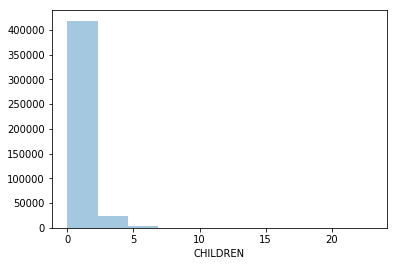

In [82]:
sns.distplot(LLCP['CHILDREN'], kde=False, bins=10);

In [46]:
plt.scatter(LLCP.MENTHLTH, LLCP.something, color='blue')
plt.title("Scatterplot of Mental Health vs Physical Health")
plt.xlabel("Mental Health")
plt.ylabel("Physical Health")
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'